In [19]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.datasets import load_diabetes


from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler


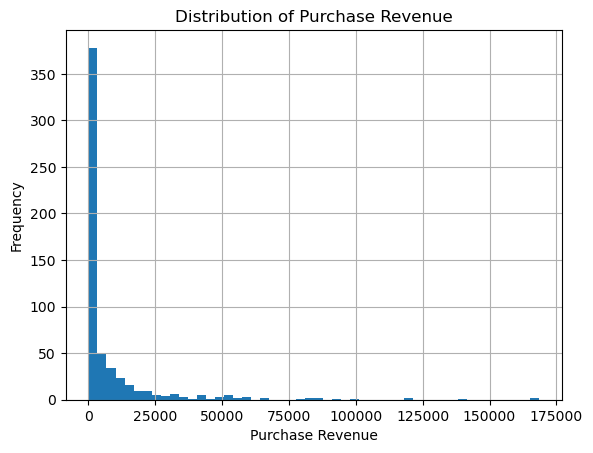

In [3]:

# Assuming data_new is your DataFrame
data_new = pd.read_csv('ga4_3.csv')

data_new['Purchase revenue'].hist(bins=50)
plt.xlabel('Purchase Revenue')
plt.ylabel('Frequency')
plt.title('Distribution of Purchase Revenue')
plt.show()



Scatter Plots for Relationships
To explore the relationship between two numerical variables, you can use a scatter plot. For example, if you want to see how 'Sessions' relate to 'Purchase revenue':

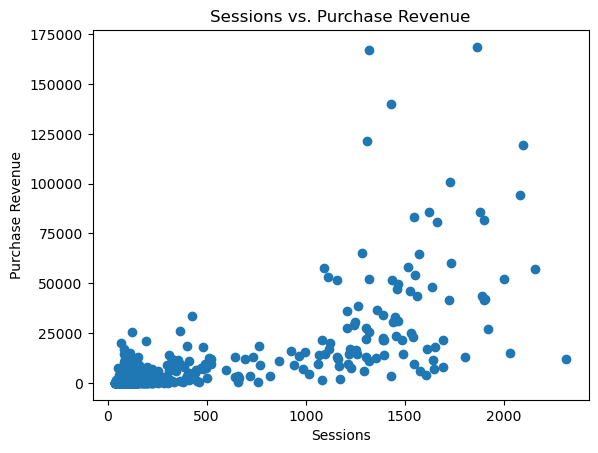

In [5]:
plt.scatter(data_new['Sessions'], data_new['Purchase revenue'])
plt.xlabel('Sessions')
plt.ylabel('Purchase Revenue')
plt.title('Sessions vs. Purchase Revenue')
plt.show()


In [9]:


# Apply one-hot encoding to the 'Channel' column
data_encoded = pd.get_dummies(data_new, columns=['Channel'])

# Display the first few rows to verify
print(data_encoded.head())

       Date  Sessions  New users  Total users  Engaged sessions  \
0  20230326      1864        969         1484              1244   
1  20230316      1321        644         1061               856   
2  20230330      1433        716         1150               937   
3  20230316      1311        685         1073              1029   
4  20230326      2096       1091         1663              1561   

   Average session duration  Avg Duration min  Ecommerce purchases  \
0                346.088537                 6                   22   
1                261.268244                 4                   13   
2                268.073562                 4                   17   
3                332.468855                 6                   26   
4                450.021830                 8                   38   

   Purchase revenue  Channel_Pinterest / paidsocial-AR  ...  \
0            168624                              False  ...   
1            167050                              F

Before Modeling (Exploratory Data Analysis)
Before you start modeling, visualizing your data can help you understand the distributions of your variables and the relationships between them.

Plotting Distributions
To visualize the distribution of a single variable (e.g., 'Purchase revenue'), you can use a histogram.

1. Handle Missing Values
Ensure that there are no missing values in your dataset, especially in columns that will be used as features for your model or the target variable (e.g., 'Purchase revenue').

In [10]:
# Simple imputation example: fill missing values with the mean of the column
#data_encoded.fillna(data_encoded.mean(), inplace=True)
print(data_encoded.isna().sum().sort_values())

Date                                                                                                            0
Channel_facebook / AR-SE: Retargeting-Tidigare besökare 1/6 2022                                                0
Channel_google / cpc-AR: Generisk BP TROAS                                                                      0
Channel_google / cpc-AR: Pmax Generisk                                                                          0
Channel_google / cpc-AR: Produkt/design BP TROAS                                                                0
Channel_google / cpc-AR: Påsk                                                                                   0
Channel_google / cpc-VV_Svenskt Tenn_DSA_SE                                                                     0
Channel_google / cpc-VV_Svenskt Tenn_DSA_SE_Sthlm-Gbg-Mö                                                        0
Channel_google / cpc-VV_Svenskt Tenn_SEA_Pure Brand_SE                                  

In [12]:
# Simple imputation example: fill missing values with the mean of the column
data_encoded.fillna(data_encoded.mean(), inplace=True)


2. Feature Selection
Decide which columns (features) you will use to predict your target variable. It looks like you're interested in predicting 'Purchase revenue', so you'll need to choose which other columns to use as predictors.

3. Split the Data
Divide your dataset into training and testing sets to evaluate the performance of your model.

In [20]:
from sklearn.model_selection import train_test_split

# Define your features and target variable
X = data_encoded.drop('Purchase revenue', axis=1)  # Features
y = data_encoded['Purchase revenue']  # Target variable

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Only transforming the test data. 

<Axes: >

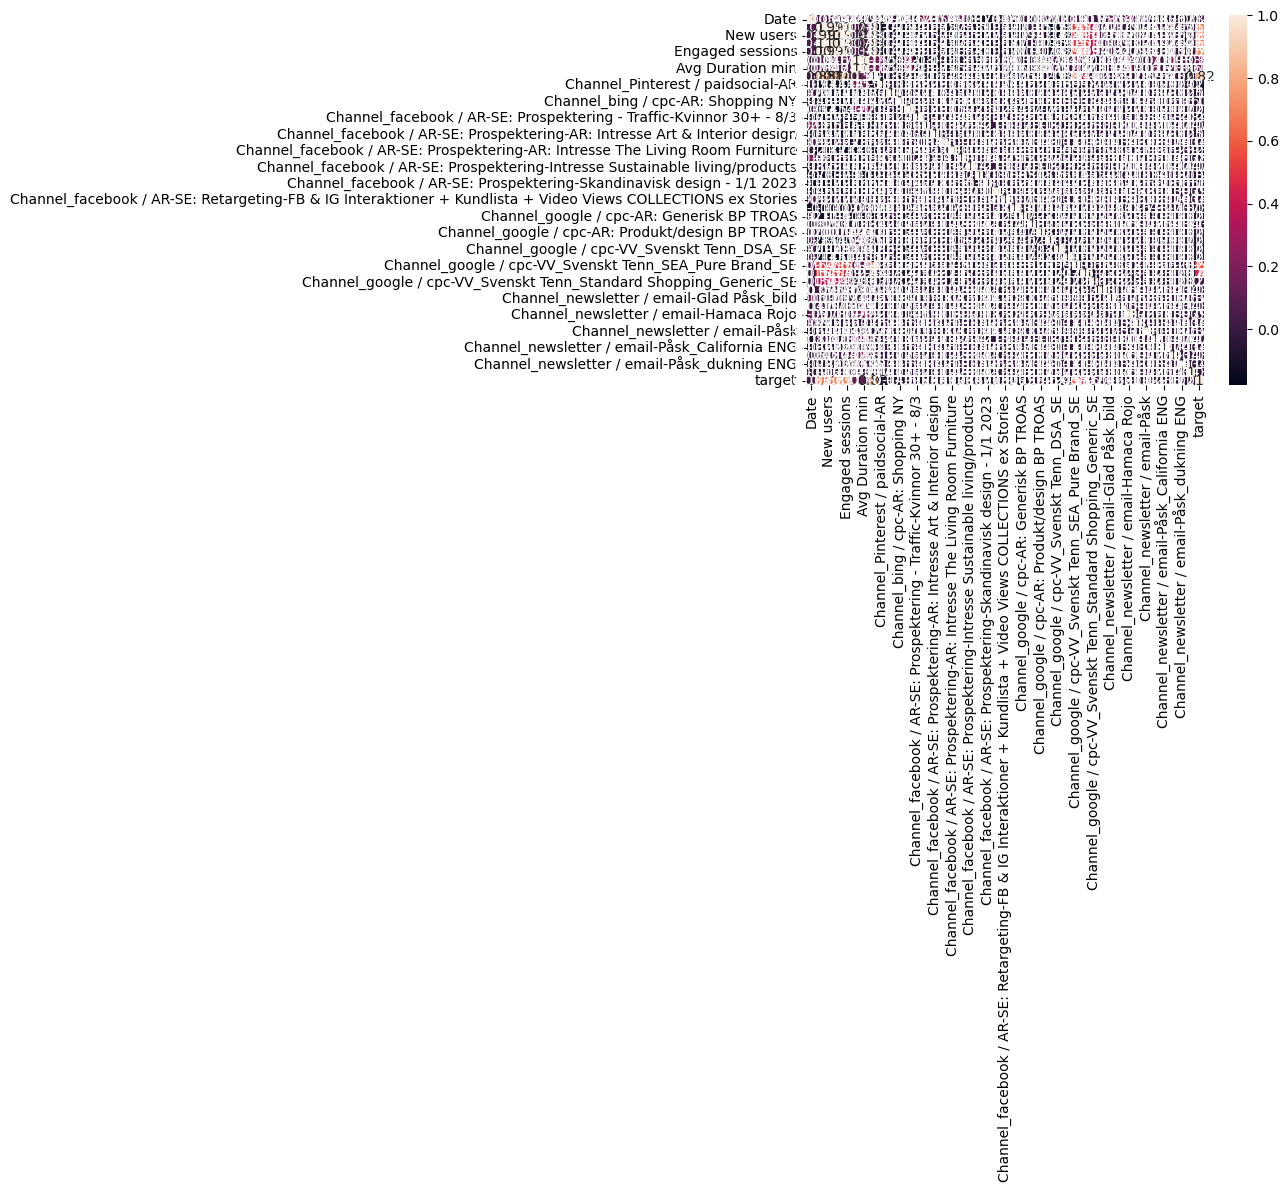

In [44]:
# Placing all the data in "df" so I can make a nice correlation plot
data_encoded = X.copy()
data_encoded['target'] = y

correlation_matrix =data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True)

. Model Selection
Choose a machine learning model that suits your problem. For predicting a numerical value like 'Purchase revenue', a regression model could be appropriate.

5. Train the Model
Train your chosen model on the training data.

In [21]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train_scaled, y_train)


LinearRegression()

6. Evaluate the Model
Assess your model's performance using the testing set.

In [25]:

# Extract the coefficients
coefficients = model.coef_

# Set display options
pd.set_option('display.float_format', '{:.2f}'.format)  # Adjust float format to avoid scientific notation
pd.set_option('display.max_colwidth', None)  # Ensure full display of feature names


# Create a DataFrame to view the feature names alongside their coefficients
feature_importance_lin = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})

# You might want to look at the absolute values of the coefficients to understand the strength
# regardless of the direction (positive or negative)
feature_importance_lin['Absolute'] = feature_importance_lin['Coefficient'].abs()

# Sort the features by absolute value of their coefficient to see the most important features
feature_importance_lin = feature_importance_lin.sort_values(by='Absolute', ascending=False)

print(feature_importance_lin)

                                                                                                         Feature  \
29                                                      Channel_google / cpc-VV_Svenskt Tenn_DSA_SE_Sthlm-Gbg-Mö   
31                                   Channel_google / cpc-VV_Svenskt Tenn_Standard Shopping_Designers/Product_SE   
24                                                                    Channel_google / cpc-AR: Generisk BP TROAS   
26                                                              Channel_google / cpc-AR: Produkt/design BP TROAS   
32                                             Channel_google / cpc-VV_Svenskt Tenn_Standard Shopping_Generic_SE   
28                                                                   Channel_google / cpc-VV_Svenskt Tenn_DSA_SE   
8                                                                              Channel_Pinterest / paidsocial-AR   
11                                                                      

In [39]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2}")




Mean Squared Error: 129609625.74217124
R^2 Score: 0.6971406537939415


NameError: name 'np' is not defined

After Modeling (Interpreting Results)
After you have your model's predictions, you can visualize how well your model's predictions match up against the actual values.

Plotting Predictions vs. Actual Values
A scatter plot can also be useful to compare the actual and predicted values of 'Purchase revenue'.

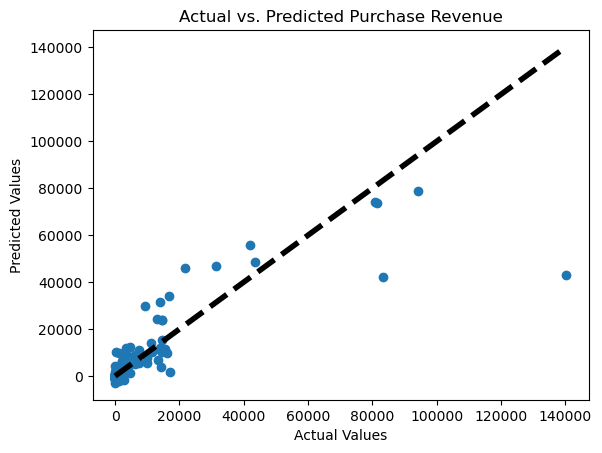

In [36]:
plt.scatter(y_test, predictions)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Purchase Revenue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)  # Diagonal line for reference
plt.show()


nterpreting Mean Squared Error (MSE) and R^2 Score
Mean Squared Error (MSE): This is the average of the squares of the errors between the actual and predicted values. A lower MSE indicates a better fit of the model to the data. In your case, the MSE is relatively high, suggesting there might be considerable variance between the predicted and actual values.

R^2 Score: This is the coefficient of determination, which measures the proportion of the variance in the dependent variable that is predictable from the independent variable(s). An R^2 score of 1 indicates a perfect fit. Your R^2 score of approximately 0.697 suggests that around 69.7% of the variance in 'Purchase Revenue' can be explained by your model, which is fairly good.

By plotting your data and results, you can gain a more intuitive understanding of your model's performance and where it might be falling short. This can guide you in making improvements, such as adding more features, trying different models, or transforming your variables.

3. Analyze Predictions
Analyze the predicted revenue figures to understand which channels are expected to perform best. This analysis will help you determine where to allocate your budget for maximum impact.

4. Allocate Budget
Based on the predicted performance of each channel, allocate your marketing budget proportionally. Channels predicted to generate higher revenue might warrant a larger share of the budget.

5. Monitor and Adjust
After implementing your budget allocation strategy, closely monitor the performance of each channel. Compare actual performance data against your model's predictions to assess accuracy. Be prepared to adjust your budget allocation as new data comes in or as market conditions change.

Example Decision Making:
Channel Performance: If your model predicts that certain channels (e.g., organic search, email marketing) are likely to result in higher purchase revenue, you might decide to increase investment in these areas.
ROI Consideration: Consider the cost of investment in each channel versus the predicted revenue. Some channels may offer a better return on investment, even if they don't generate the highest total revenue.
Strategic Adjustments: Use insights from your model predictions to explore strategic adjustments, such as testing new campaign messages in high-performing channels or reallocating budget from underperforming channels.
By following these steps, you can leverage your machine learning model to make data-driven decisions on budget allocation for the Easter period, optimizing your marketing efforts based on predicted channel performance.


In [ ]:
# Assuming you have loaded your future data into a DataFrame named `future_data`
# Make sure to apply the same preprocessing steps as your training data
future_data_encoded = pd.get_dummies(future_data, columns=['Channel'])

# Check for any missing columns in the new data and add them with default value of 0
missing_cols = set(X_train.columns) - set(future_data_encoded.columns)
for c in missing_cols:
    future_data_encoded[c] = 0

# Ensure the order of columns matches the training data
future_data_encoded = future_data_encoded[X_train.columns]

# Predict future revenue
future_predictions = model.predict(future_data_encoded)
